In [1]:
import sys
sys.path.insert(0, '../src')

from megs.model.mPCA import mPCA
from megs.data import image, DataLoader

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

# Load mm object from the file
filename = "morphmodel.pkl"
with open(filename, "rb") as file:
    mm = pickle.load(file)

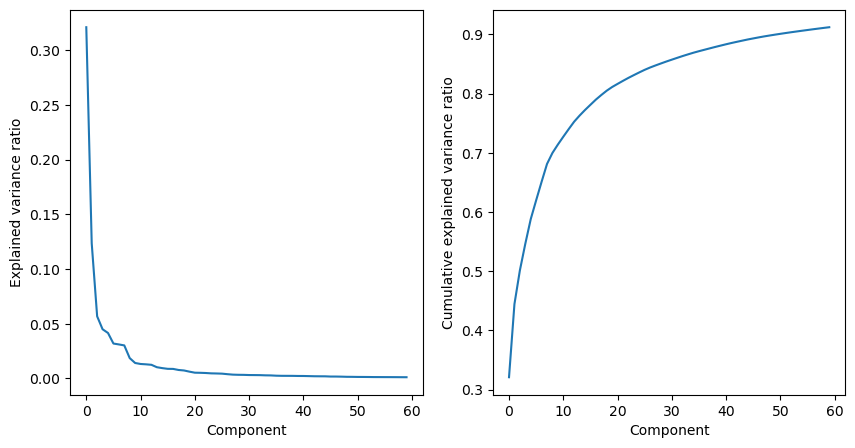

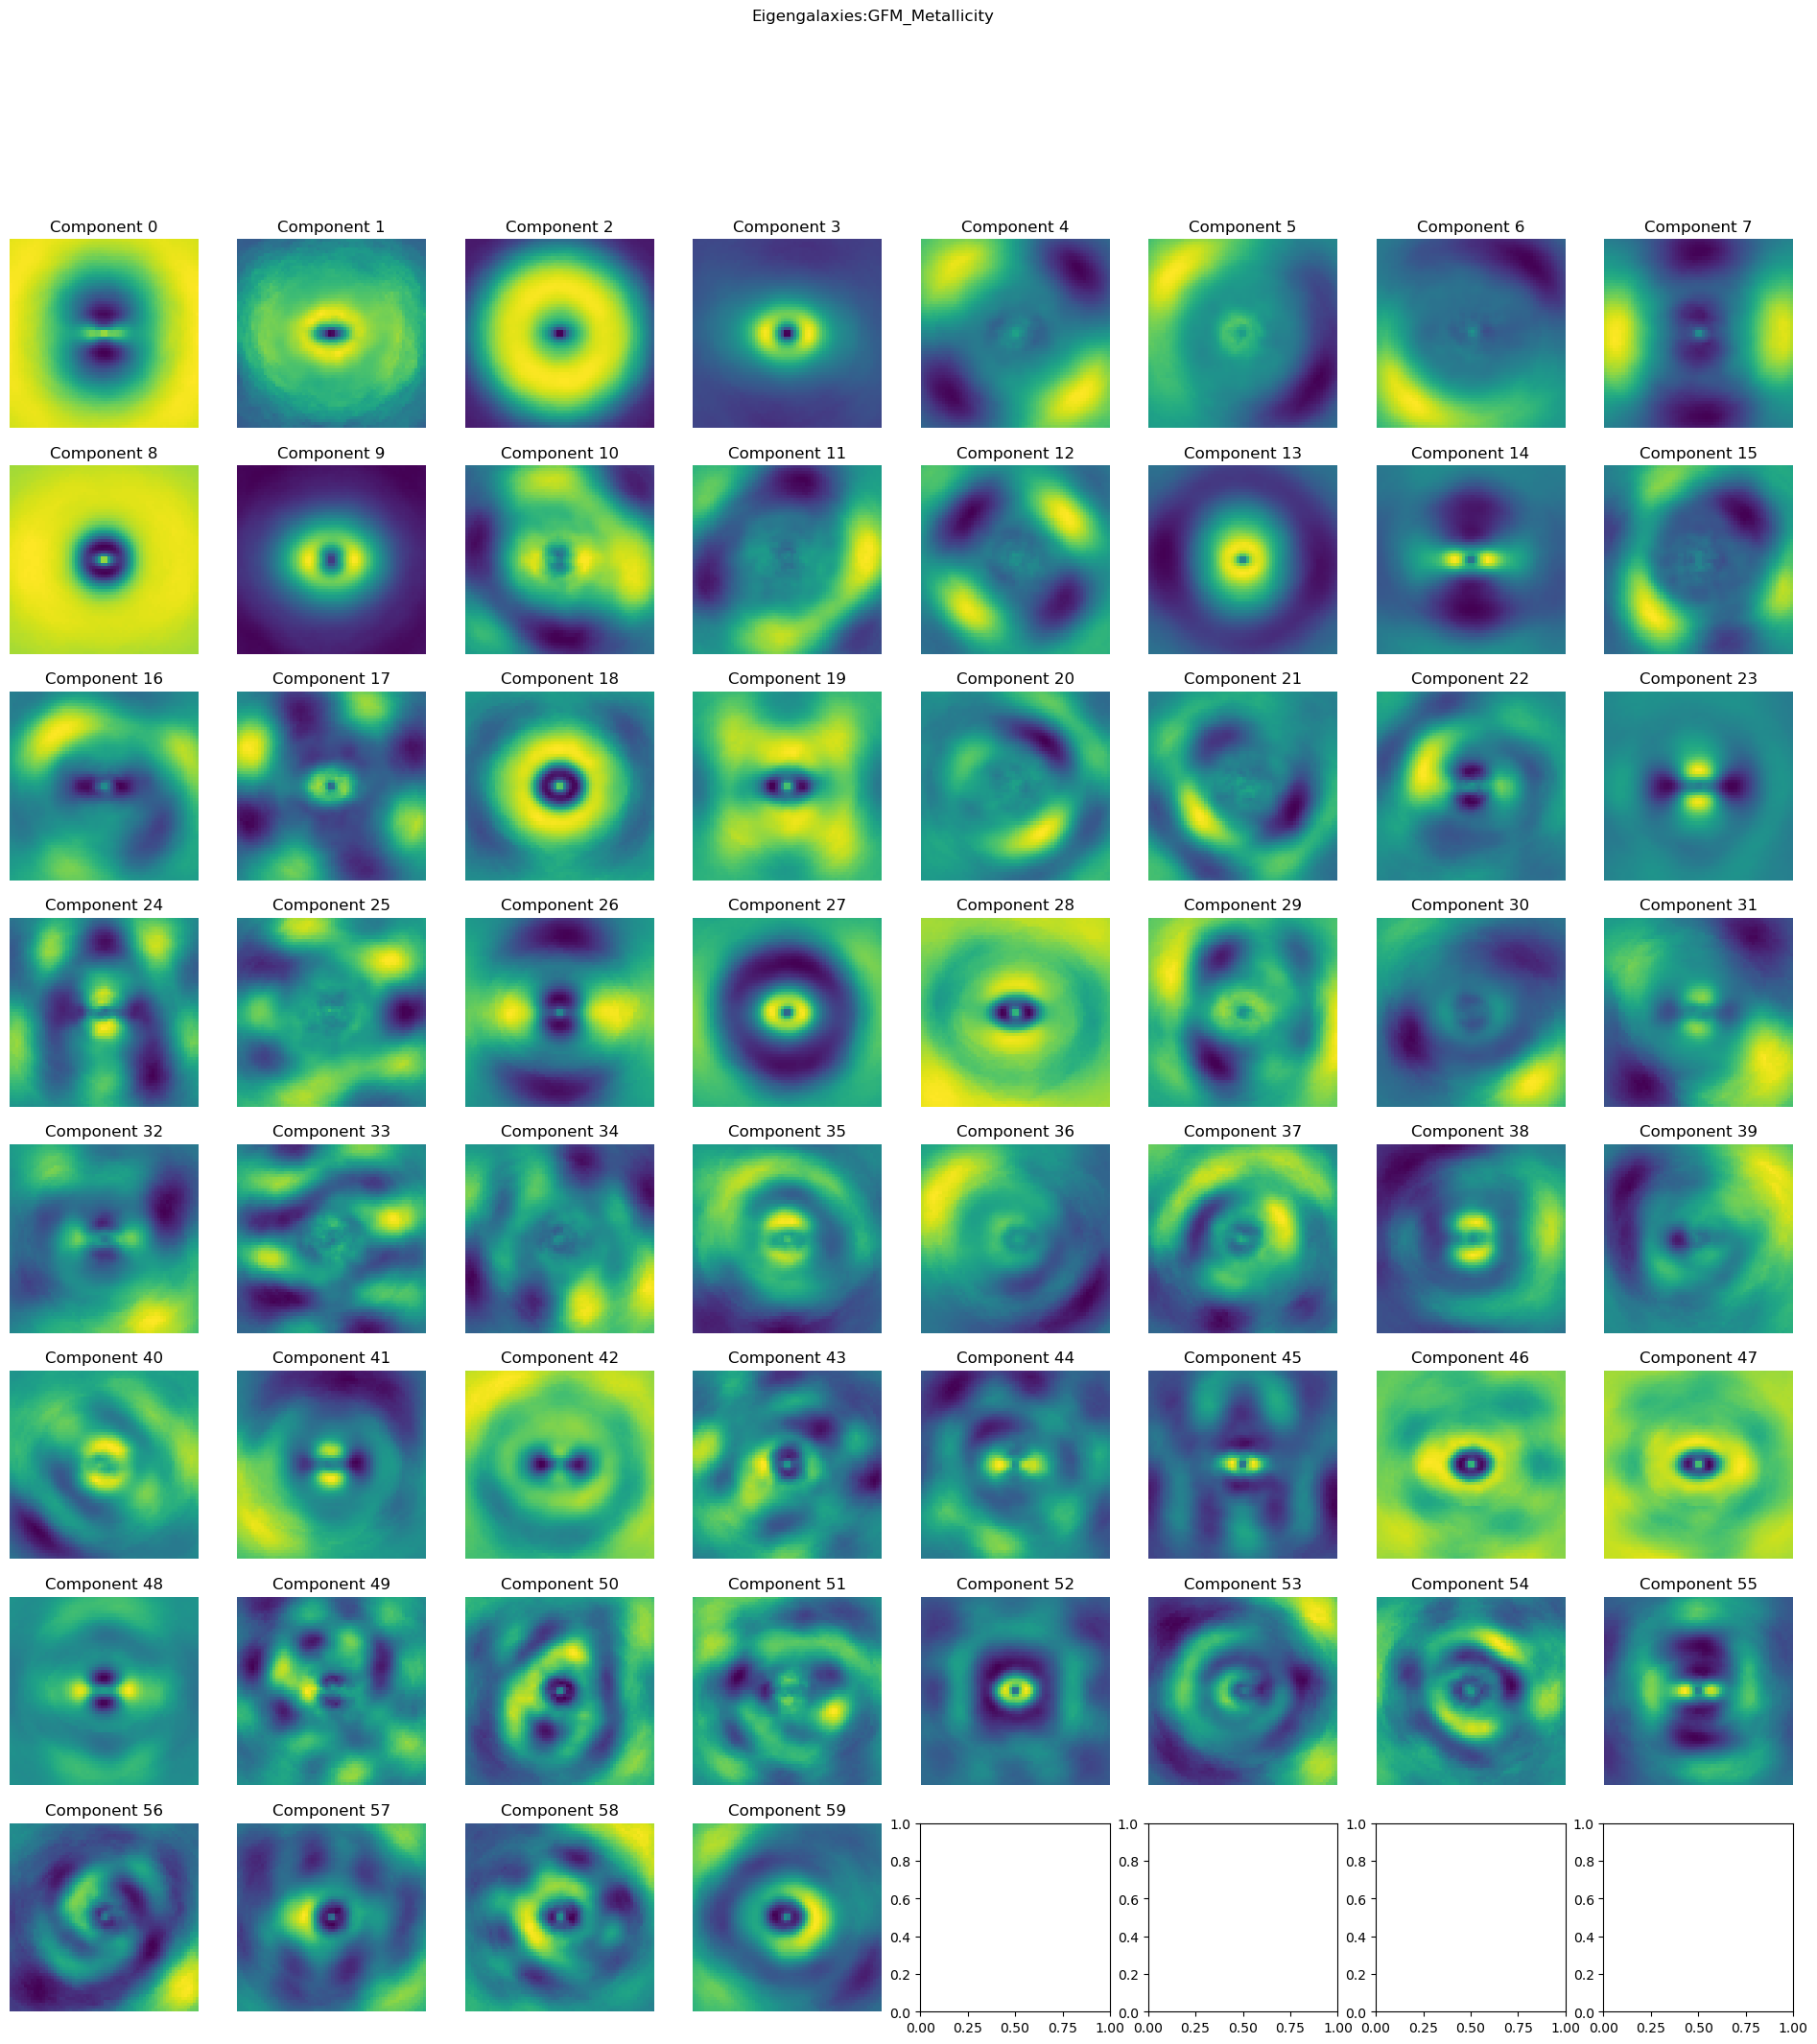

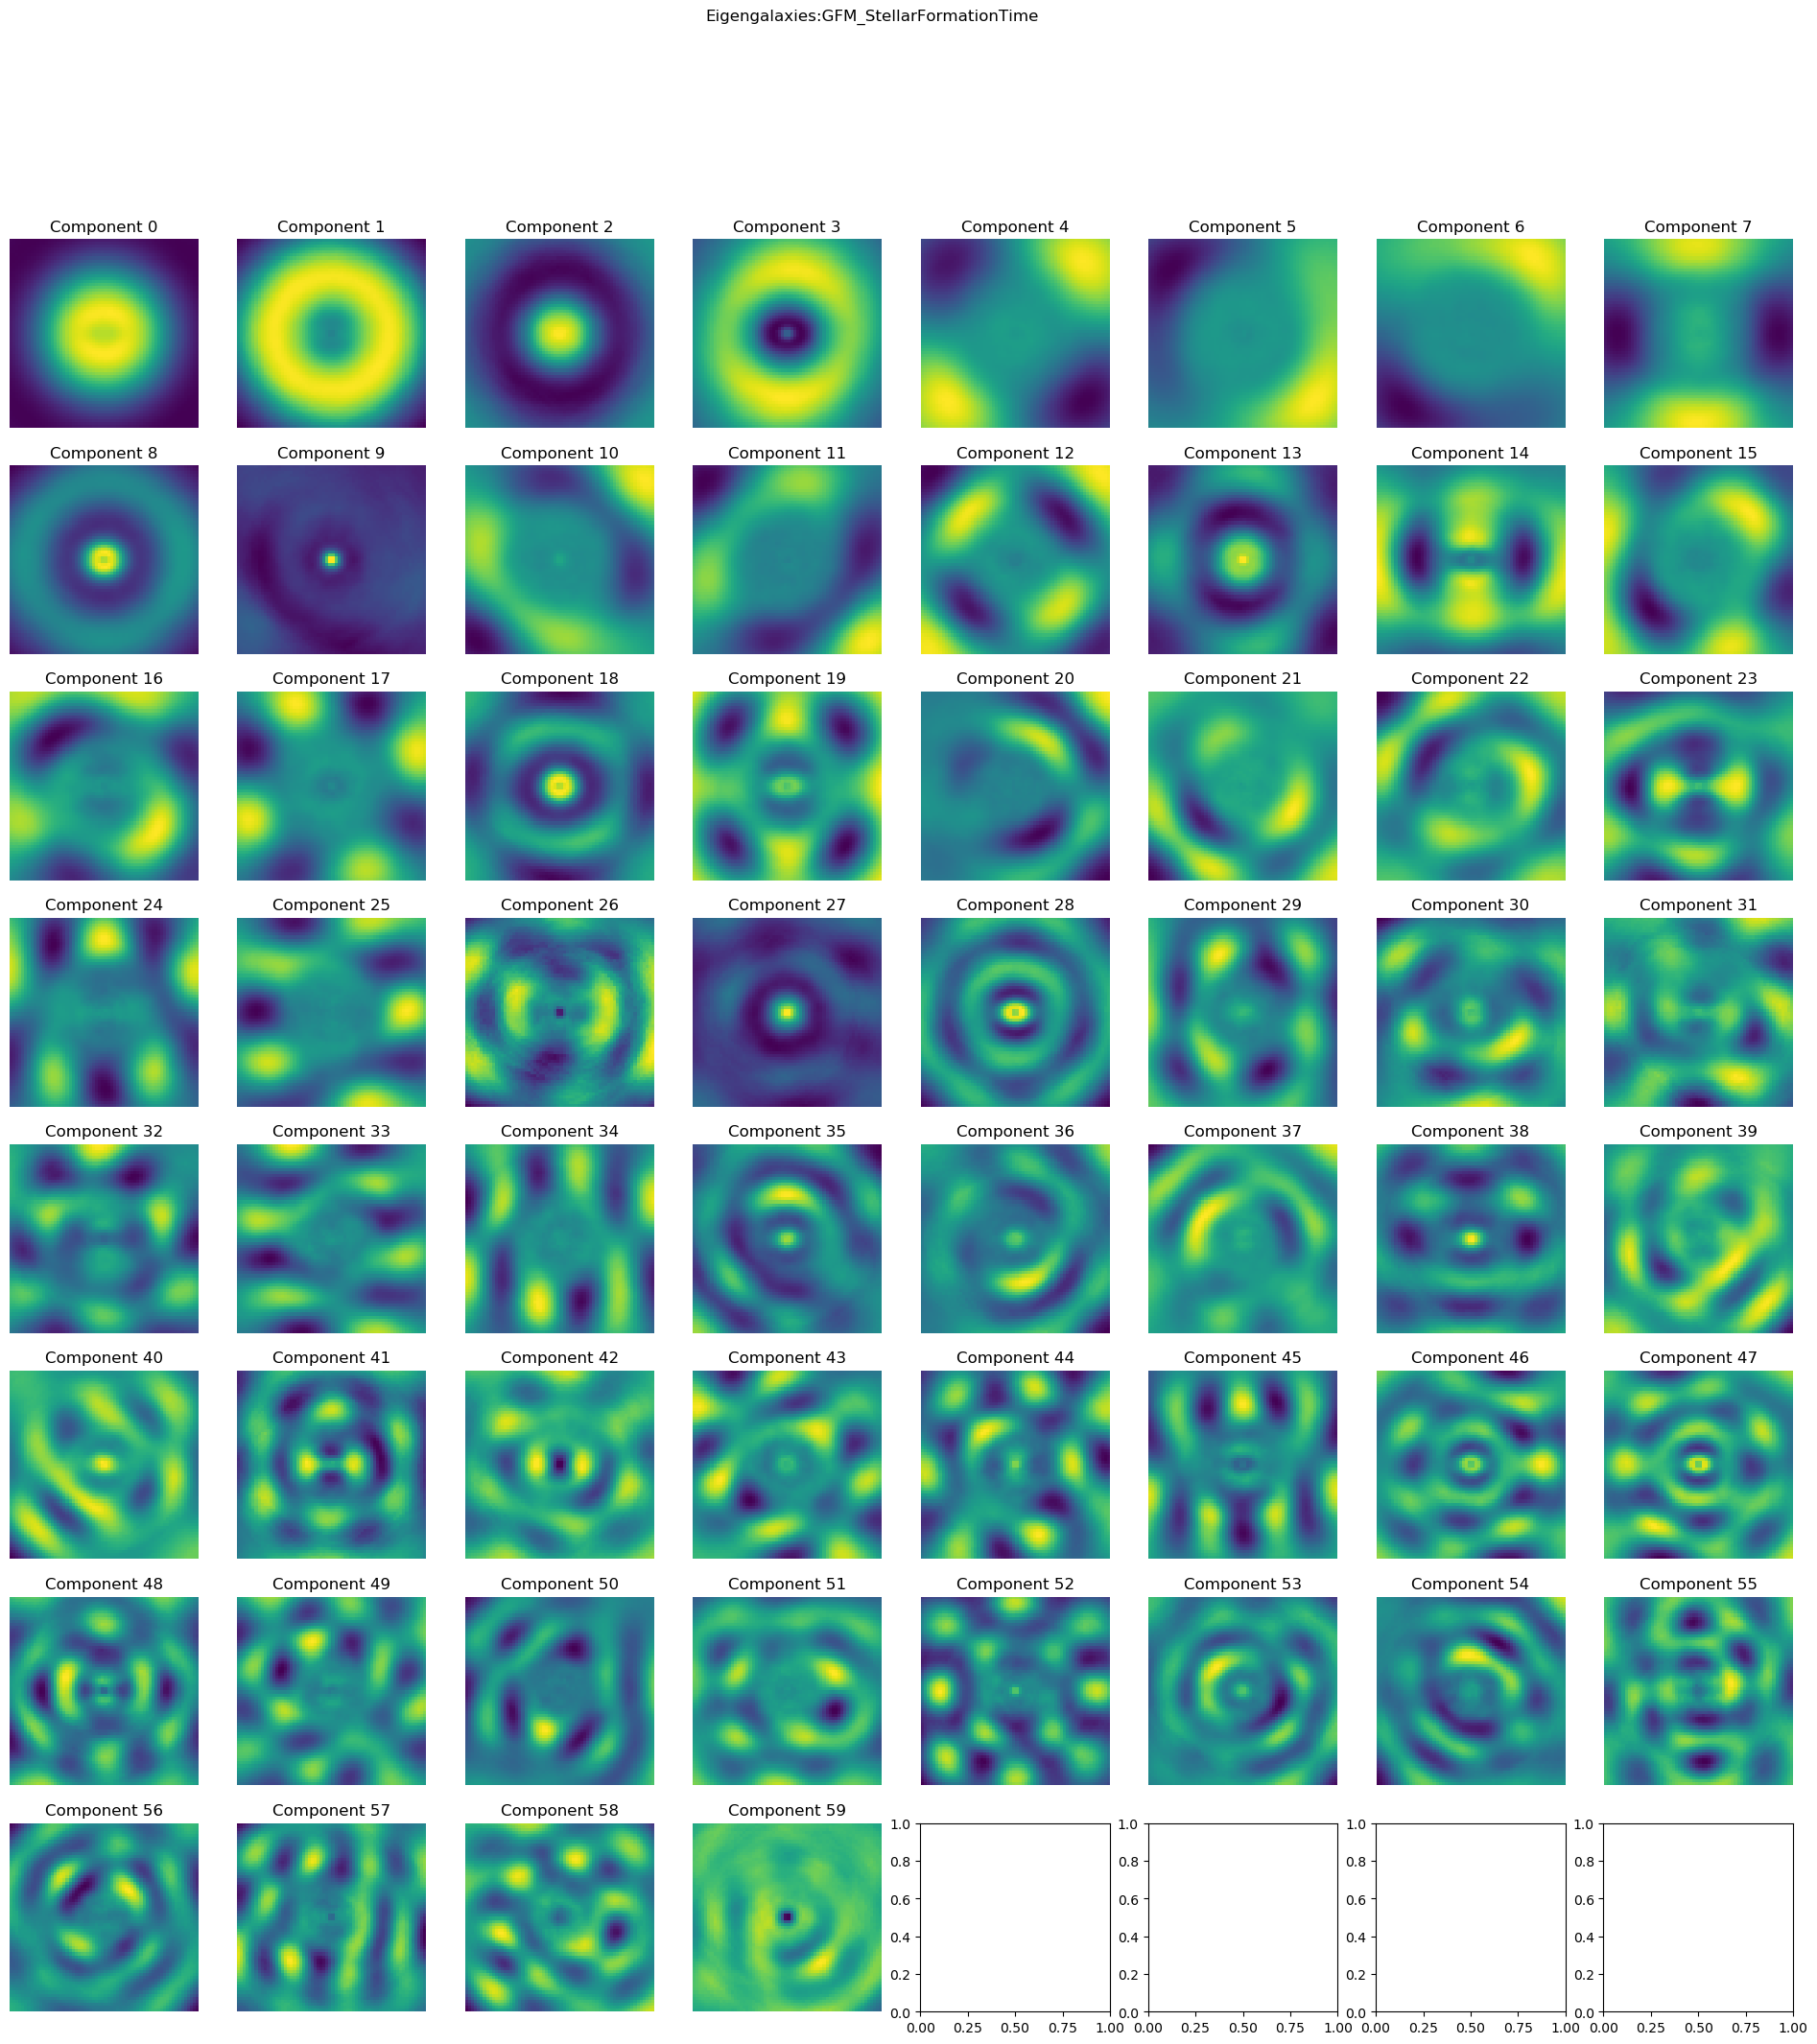

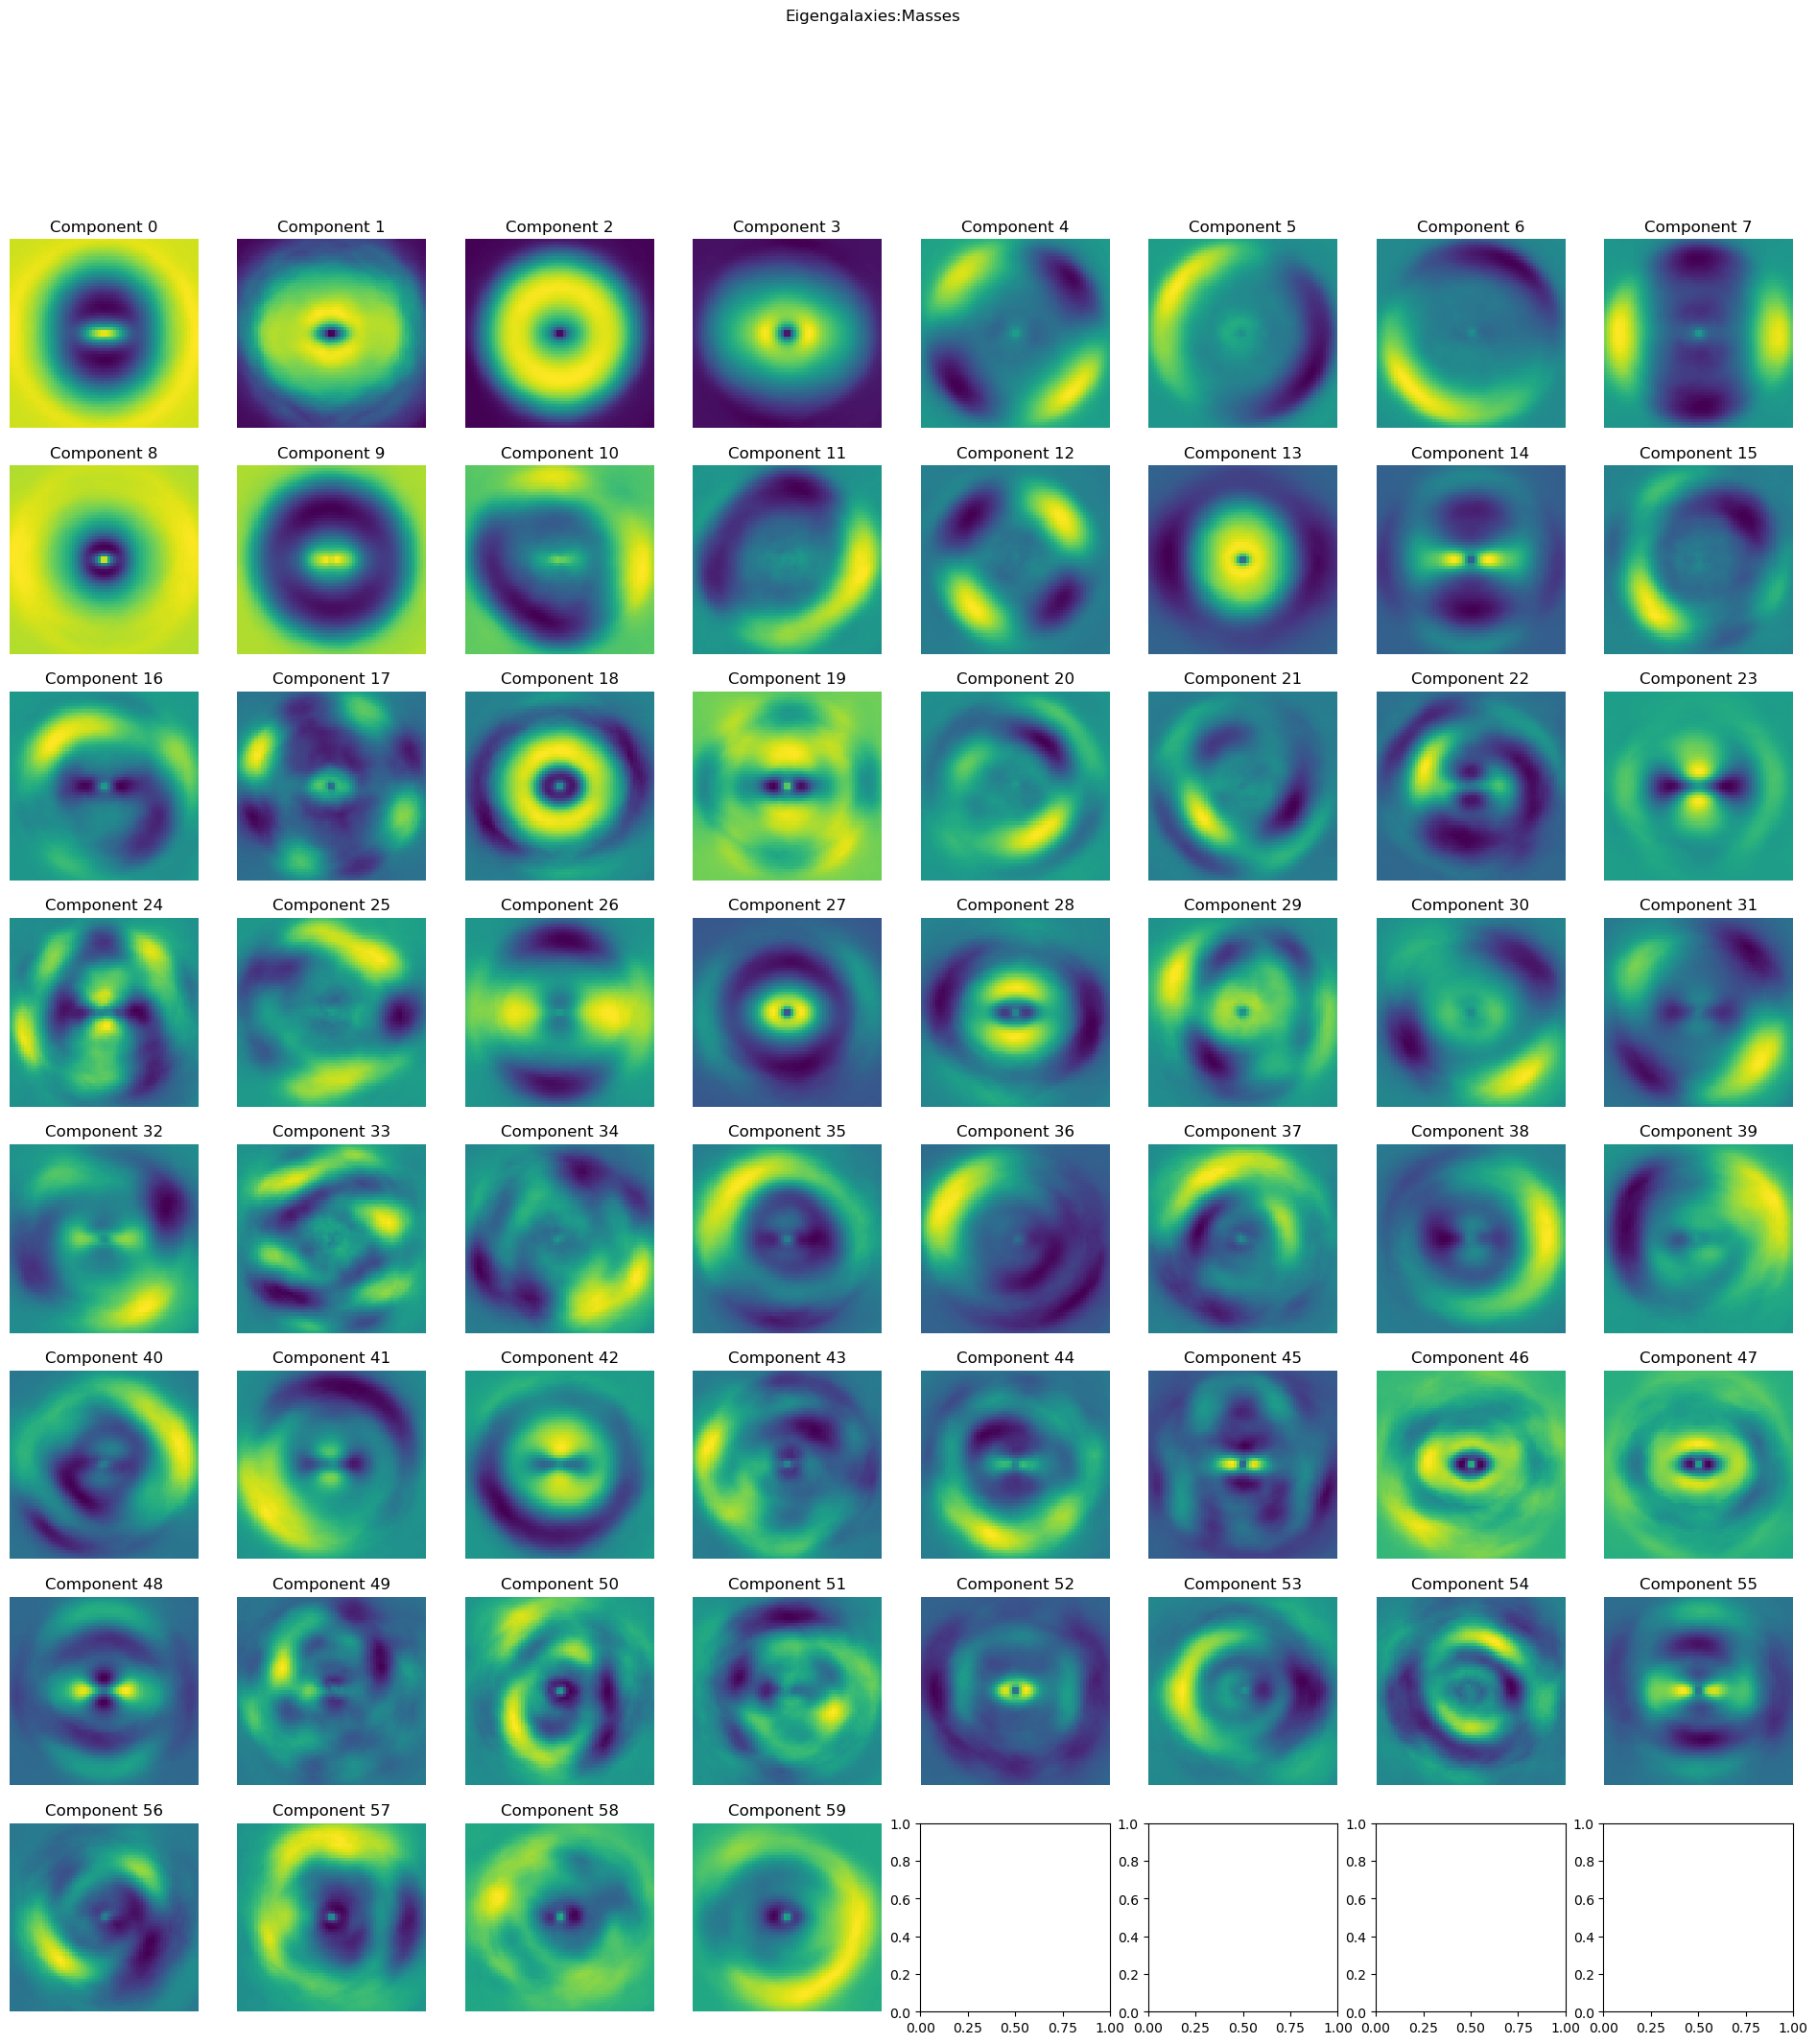

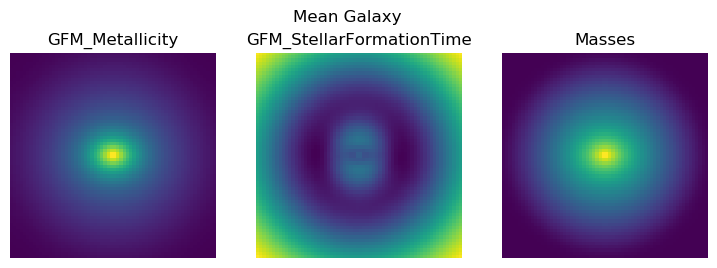

760.822275783361 2.842395811800298e-05


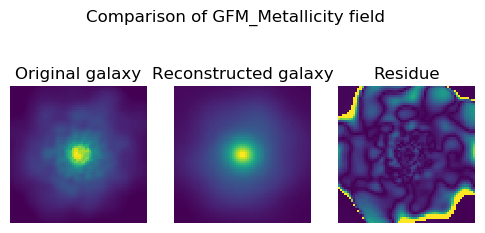

212.3175427531711 7.421570659523373e-06


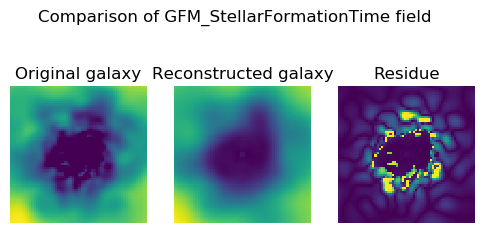

253.3679732487588 4.568867334550685e-06


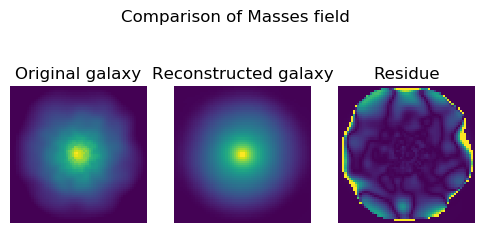

In [2]:
mm.show_results()

In [5]:
index = 10
rec = mm.inverse_transformed_datamatrix[index].reshape(3, *mm._IMG_SHAPE)
original = mm.datamatrix[index].reshape(3, *mm._IMG_SHAPE)
        
res = np.abs(rec - original)

In [8]:
# Calculate reconstruction error
mse = np.mean((original - rec) ** 2)
psnr = 20 * np.log10(255) - 10 * np.log10(mse)

print(f"Reconstruction MSE: {mse}")
print(f"Reconstruction PSNR: {psnr}")

Reconstruction MSE: 0.0017514627622403375
Reconstruction PSNR: 75.69679452628677


In [25]:
import numpy as np
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from scipy.linalg import sqrtm

# Reshape the galaxy data and PCA-generated data
galaxy_data = galaxydata.reshape(galaxydata.shape[0], 3, 64, 64)
pca_data = pcadata.reshape(pcadata.shape[0], 3, 64, 64)

# Load the pre-trained Inception model
inception_model = models.inception_v3(pretrained=True, transform_input=False)
inception_model.eval()

# Define the transformation for preprocessing
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Generate a set of images using your PCA model
generated_images = pca_data  # Replace with your PCA-generated images

# Preprocess the generated images
preprocessed_generated = torch.stack([preprocess(img) for img in generated_images])

# Calculate the Inception activations for the generated images
def get_activations(images, model):
    activations = []
    with torch.no_grad():
        for i in range(len(images)):
            image_tensor = images[i].unsqueeze(0).cuda()  # Convert to tensor and add batch dimension
            activations.append(model(image_tensor)[0].view(1, -1))
    return torch.cat(activations, dim=0)

generated_activations = get_activations(preprocessed_generated, inception_model)

# Calculate the mean and covariance of the generated activations
mu_generated, sigma_generated = generated_activations.mean(dim=0).cpu().numpy(), np.cov(generated_activations.cpu().numpy().T)

# Load the pre-calculated mean and covariance of the real dataset activations
mu_real = np.load('path_to_real_mu.npy')  # Replace with the path to the pre-calculated mean
sigma_real = np.load('path_to_real_sigma.npy')  # Replace with the path to the pre-calculated covariance

# Calculate the Frechet Inception Distance (FID)
fid = np.sum((mu_real - mu_generated)**2) + np.trace(sigma_real + sigma_generated - 2 * sqrtm(sigma_real @ sigma_generated))
print("FID:", fid)



/export/home/ucakir/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/export/home/ucakir/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


RuntimeError: The size of tensor a (64) must match the size of tensor b (3) at non-singleton dimension 0

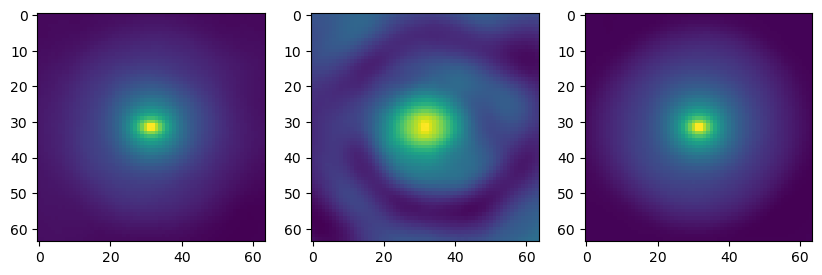

In [51]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(bandwidth=0.2)  # Adjust the bandwidth parameter as needed
kde.fit(mm.scores)
num_samples = 100  # Number of samples to generate
generated_samples = kde.sample(num_samples)

generated_data = mm.reconstruct(generated_samples[26])

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].imshow(generated_data.reshape(3, *mm._IMG_SHAPE)[0])
ax[1].imshow(generated_data.reshape(3, *mm._IMG_SHAPE)[1])
ax[2].imshow(generated_data.reshape(3, *mm._IMG_SHAPE)[2])

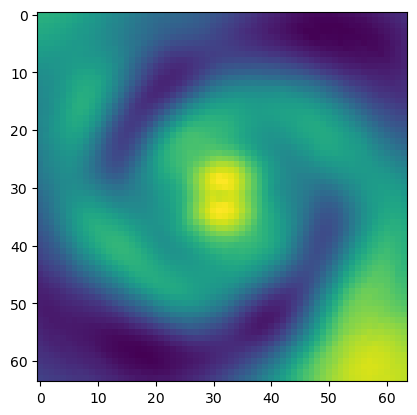

In [29]:
generated_samples.shape

(100, 60)